# 3. EDA

##      3.1. Exploración y limpieza superficial de los datos

In [79]:
import pandas as pd

In [80]:
# Importamos nuestro .csv y lo convertimos a dataframe con pandas
df = pd.read_csv('/workspaces/EDA_3/data/raw/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tras ver la información apreciamos rápidamente que todas las columnas contienen exaxctamente el mismo número de valores que equivalen a la longitud del conjunto. 

Con esto sabemos ya de antemano que nuestros datos están bien arreglados y que no tendremos que trabajarlos de más para poder utilizarlos posteriormente.

In [82]:
print(len(df.drop_duplicates().sum()))

7


7 duplicados es una cifra realista, así que consideramos oportuno no borrarlos.

In [83]:
# df.drop_duplicates(inplace=True)

In [84]:
df.shape

(1338, 7)

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

## 3.2 Análisis univariante

Disponemos de un código automatizado que itera por todas las columnas del conjunto de datos para devolvernos un histograma de cada una de las columnas disponiendo dos de ellos por fila de diagrama. 

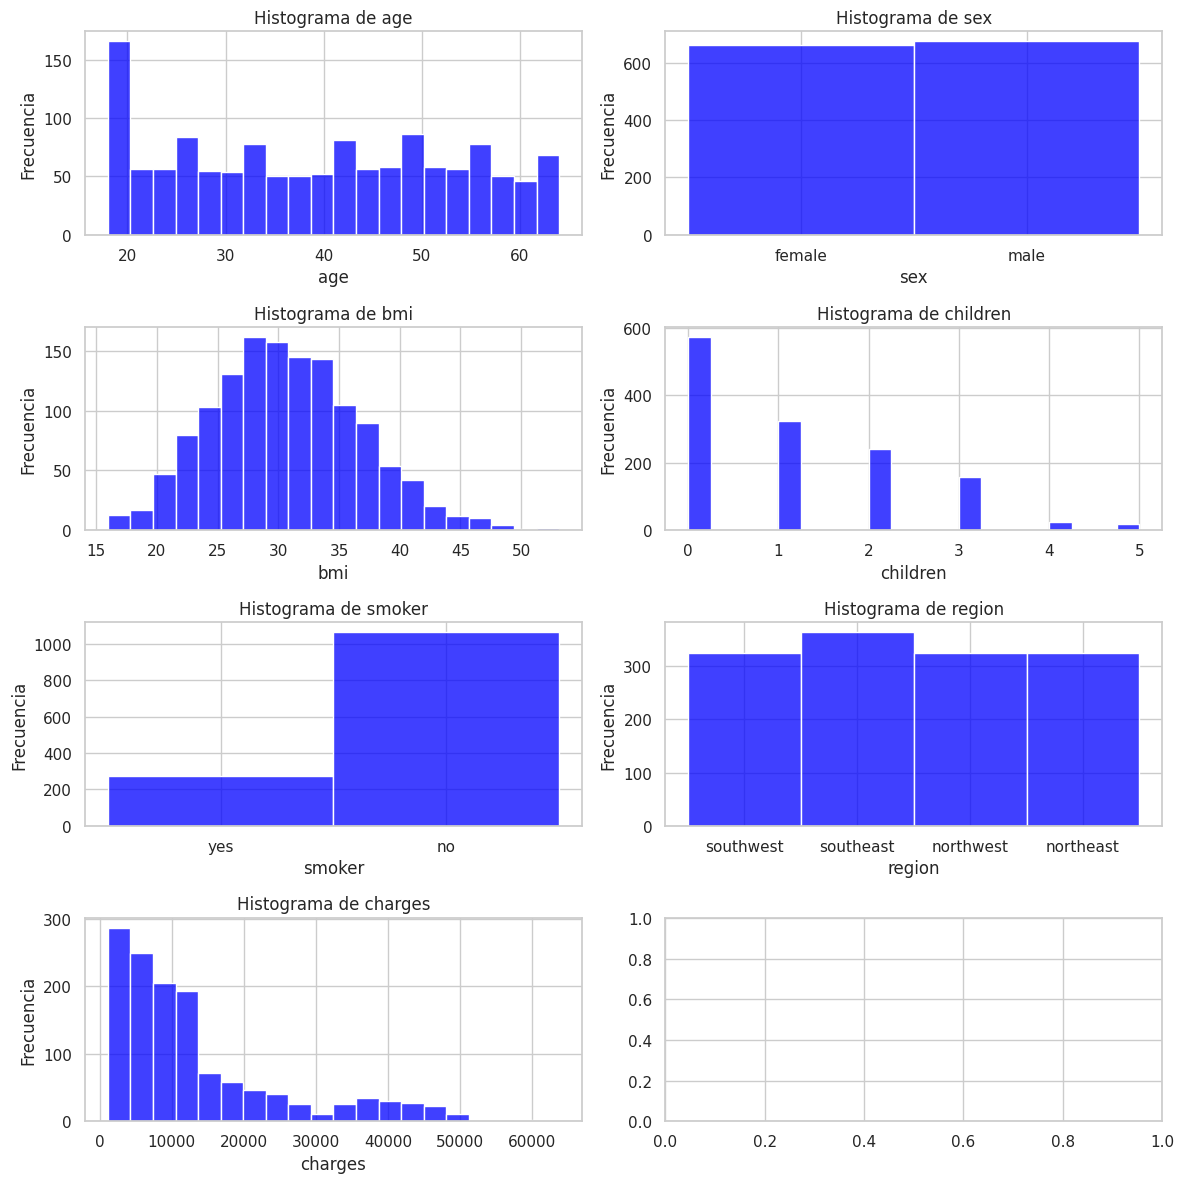

In [86]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Obtener el número de columnas en el DataFrame
num_columns = len(df.columns)

# Establecer el número de subgráficos por fila
num_subplots_per_row = 2

# Calcular el número total de filas necesarias
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Aplanar la matriz de subgráficos para facilitar la iteración
axes = axes.flatten()

# Iterar por cada columna y crear un histograma
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='blue', ax=ax)  # Puedes ajustar los parámetros según tus preferencias
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

Observaciones destacables:

- la mayoría de las personas ronda los 20 años de edad
- el sexo está distribuido de forma prácticamente igual
- el índice de masa corporal (bmi) se concentra en el centro, teniendo un diagrama cercano al de una distribución normal
- la cantidad del número de hijos desciende gradualmente desde 0 hasta 5
- hay muchos más no fumadores que fumadores
- la distribución entre las regiones está equiparada
- los cargos en la cuenta (que será nuestro target) son descendentes

A continuación factorizamos todas las columnas para poder continuar con el análisis multivariante y finalmente con la normalización.
Nos guardamos las etiquetas de las columnas factorizadas para posterior orientación.

In [87]:
# Creamos una función que factoriza los valores insertados
def factor(column):
    df[column] = pd.factorize(df[column])[0]

# Creamos otra función que nos almacenará el nombre de las etiquetas en una lista
tag_list = []
def tags (column):
    tag_string = pd.factorize(df[column])[1]
    tag_list.append(tag_string)

# Creamos una lista de las columnas categóricas
to_factor = ["sex", "smoker", "region"]

# Iteramos sobre esta lista para pasar cada elemento a la función
for i in to_factor:
    tags(i)   

for i in to_factor:
    factor(i)


df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


In [88]:
tag_list

[Index(['female', 'male'], dtype='object'),
 Index(['yes', 'no'], dtype='object'),
 Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')]

## 3.3 Análisis multivariante

Nuevamente utilizamos un código que nos itera por todas las columnas, esta vez para compararlas respectivamente a nuestro target ("charges) en forma de regplot de seaborn, diponiéndolos de igual manera en filas de dos diagramas.

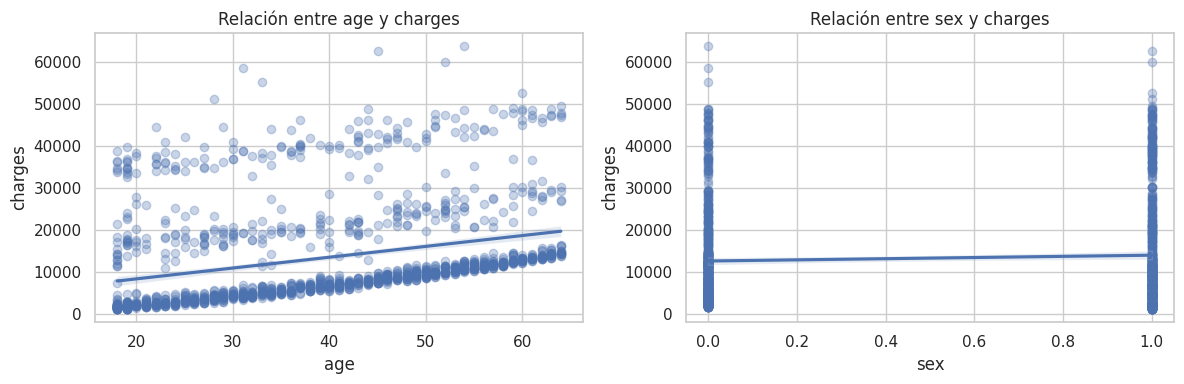

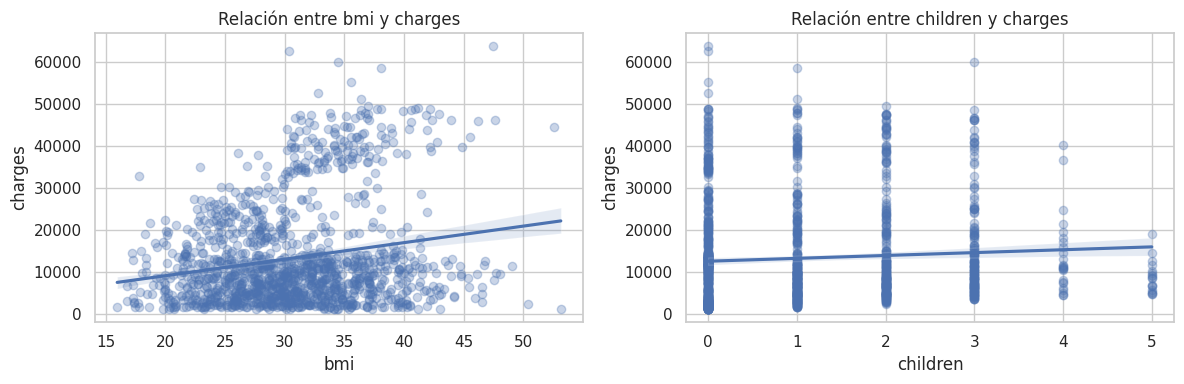

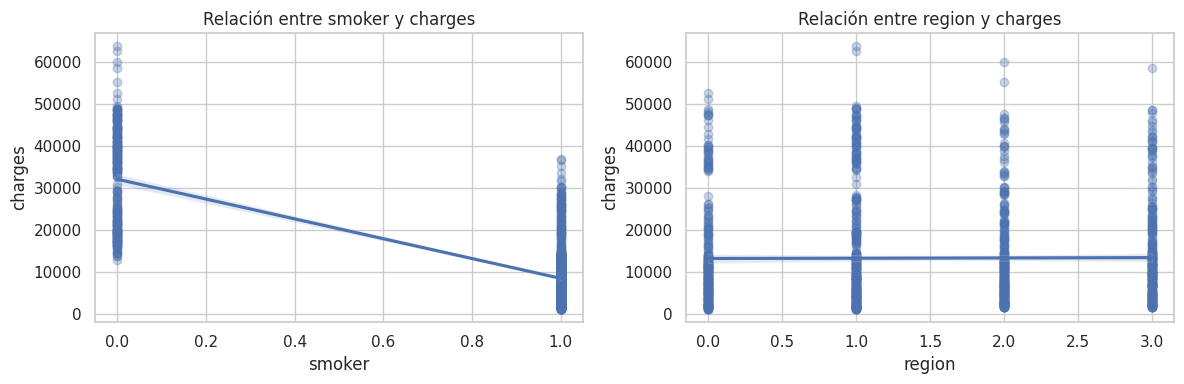

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

target_column = 'charges'

feature_columns = [col for col in df.columns if col != target_column]

# Dividir las columnas en pares
column_pairs = [(feature_columns[i], feature_columns[i+1]) for i in range(0, len(feature_columns), 2)]

# Iterar a través de los pares de columnas y trazar regplots
for pair in column_pairs:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Iterar sobre las dos columnas del par
    for i, feature_column in enumerate(pair):
        # Crear un gráfico de dispersión con línea de regresión
        sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha':0.3}, ax=axes[i])
        
        # Configuración del título y etiquetas
        axes[i].set_title(f'Relación entre {feature_column} y {target_column}')
        axes[i].set_xlabel(feature_column)
        axes[i].set_ylabel(target_column)
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

Observaciones:
- las realciones con la región y con el sexo son horizontales
- en el caso de los hijos hay un muy leve ascenso de los costes cuántos más hijos tenga el paciente
- los casos de la edad y el bmi incrementan los costes a mayores cantidades respectivamente
- en el caso de los fumadores se ve la mayor inclinación desfavorable hacia aquellos que fuman


Tras las observaciones decidimos ver relaciones entre fumador y peso corporal con el coste del seguro

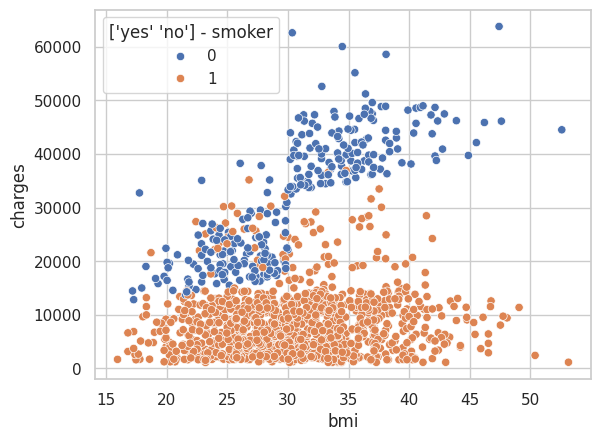

In [90]:
tag_smoker = tag_list[1]
tag_content = tag_smoker.values
sns.scatterplot(data = df, x = "bmi", y = "charges", hue = "smoker")
plt.legend(title=f"{tag_content} - {df['smoker'].name}") 
plt.show()

Vemos una fuerte prevalencia de la condición de fumador sobre el índice de masa corporal a la hora de facturar al cliente.

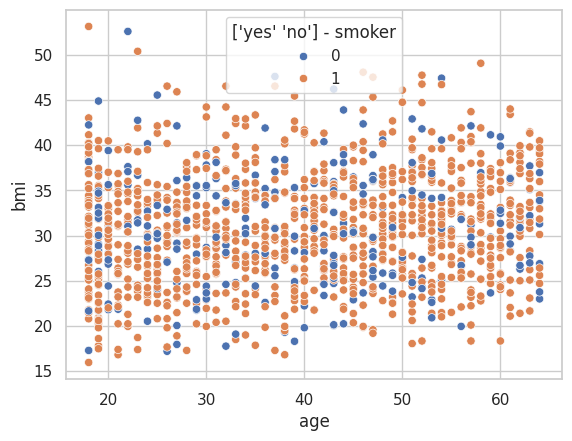

In [91]:
sns.scatterplot(data = df, x = "age", y ="bmi", hue = "smoker")
plt.legend(title=f"{tag_content} - {df['smoker'].name}") 
plt.show()

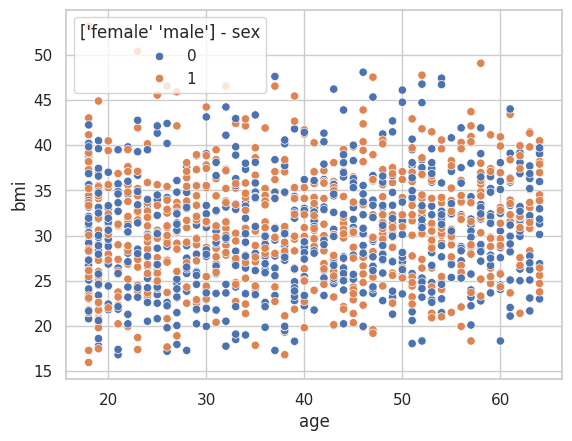

In [92]:
tag_sex = tag_list[0]
tag_content2 = tag_sex.values
sns.scatterplot(data = df, x = "age", y ="bmi", hue = "sex")
plt.legend(title=f"{tag_content2} - {df['sex'].name}") 
plt.show()

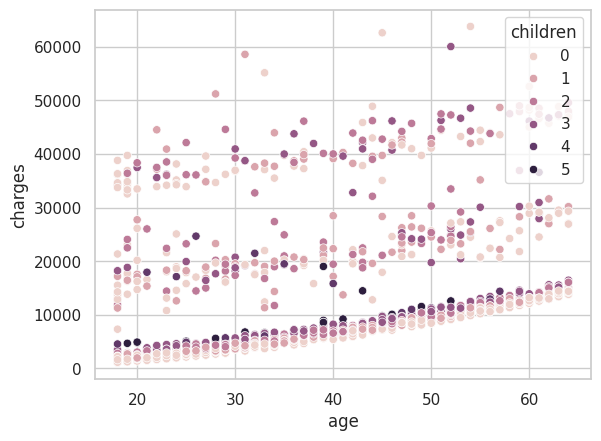

In [93]:

sns.scatterplot(data = df, x = "age", y = "charges", hue = "children")

plt.show()

Realizamos un mapa de correlaciones global entre todas las variables para constatar y reafirmar nuestras observaciones anteriores.

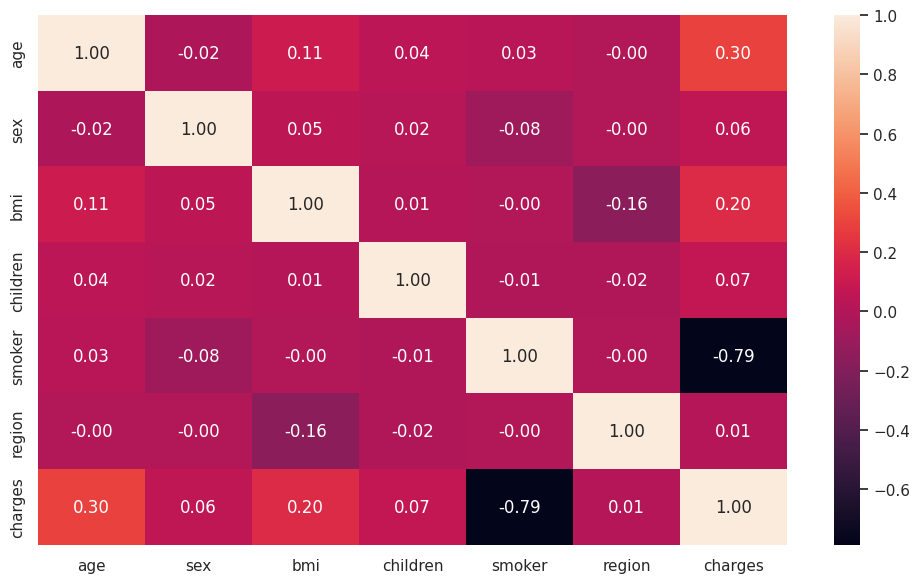

In [94]:
fig, axis = plt.subplots(figsize = (10, 6))
lista_de_columnas = df.columns.tolist()
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Efectivamente, y con diferencia, confirmamos que la condición de fumador es la que más influye en el monto del seguro, seguido de la edad y del bmi. El resto de variables no tienen prácticamente ninguna relación destacable con nuestro target.

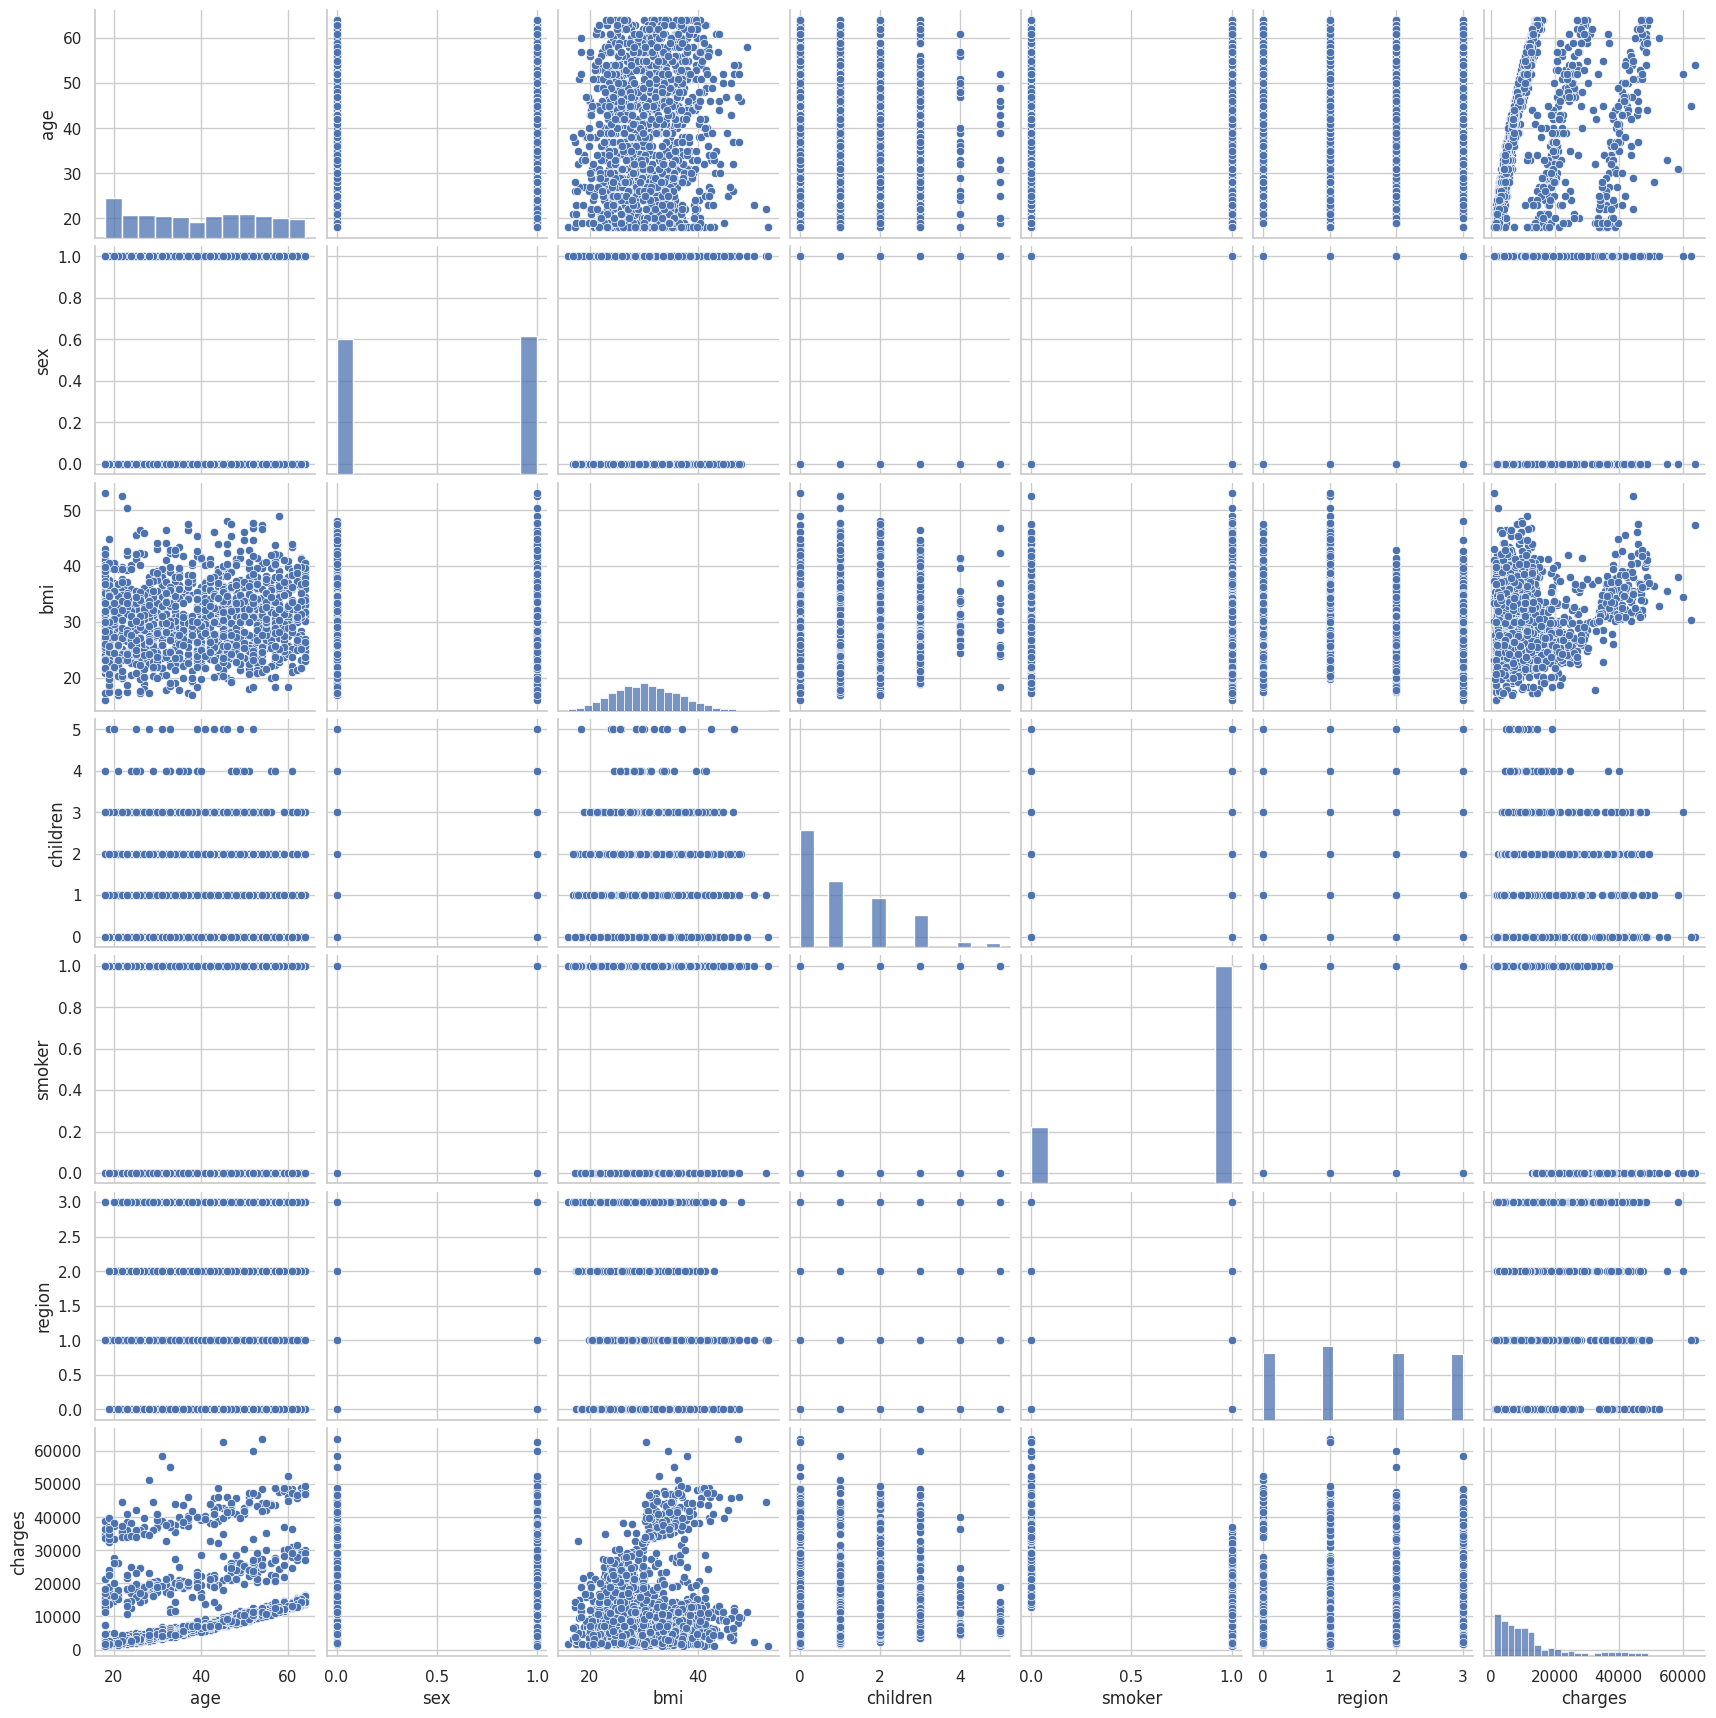

In [95]:
sns.pairplot(data = df)

## 3.4 Feature engineering 

### 3.4.1 Análisis de outliers

La función .describe() nos permite observar la variabilidad así como los cuartiles de todas las variables. Lo realizamos para tomar apuntes.

Decidimos ordenarla descendentemente por valores de std para observar las mayores desviaciones del conjunto de datos y plotearla posteriormente con sns.boxplot para visualizar los outliers.

In [96]:
df.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker,1338.0,0.795217,0.403694,0.0000,1.00000,1.000,1.000000,1.00000


<Axes: ylabel='children'>

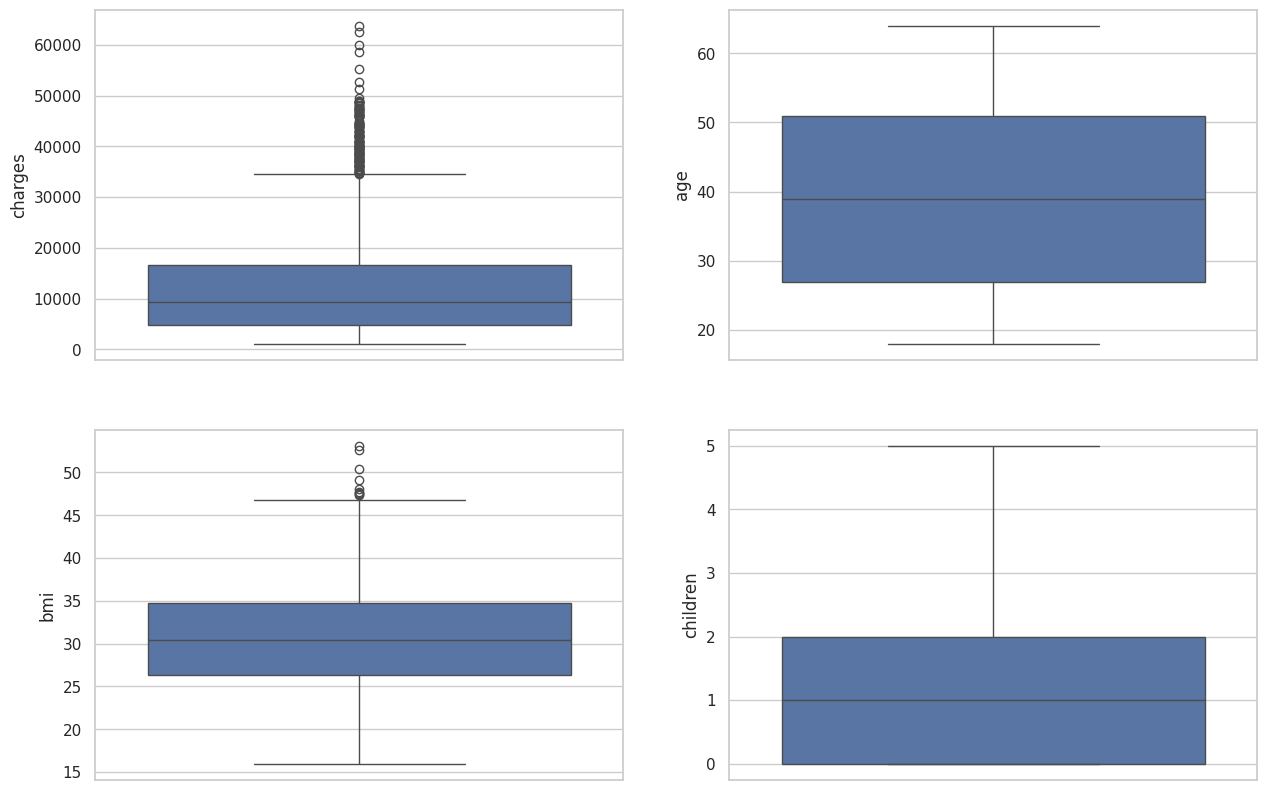

In [97]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "charges")
sns.boxplot(ax = axis[0, 1], data = df, y = "age")
sns.boxplot(ax = axis[1, 0], data = df, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = df, y = "children")

Los outliers que observamos, consideramos, entran dentro de lo normal y son vinculantes a la hora de analizar este problema en concreto. Es decir, que una persona tenga mucho sobrepeso, en el caso de los outliers del bmi, sí es relevante en una determinación del precio del seguro. Además es algo que no sorprende, entra dentro de lo normal, que hay gente con obesidad y por lo tanto su inclusión en el cáluclo debe llevarse a cabo.

### 3.4.2 Análisis de valores faltantes 

Calculamos el porcentaje de ceros por columna.

In [98]:
df.isnull().sum().sort_values(ascending=False) / len(df)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

No hay ceros así que no realizaremos más ejercicios en este apartado.

### 3.4.3 Separación train/test

Separamos los datos en train y test y los almacenamos en nuestros directorios del proyecto antes del escalado, para mantener una versión sin normalizar de los datos.

In [99]:
from sklearn.model_selection import train_test_split

X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [100]:
y_train.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_y_train.csv", index=False)
y_test.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_y_test.csv", index=False)
X_train.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_X_train.csv", index=False)
X_test.to_csv("/workspaces/EDA_3/data/processed/medical_insurance_X_test.csv", index=False)

### 3.4.4 Escalado de variables

Normalizamos los datos por separado (train/test) con StandardScaler de sklearn y los almacenamos en nuestro directorio /interim. 
Asímismo haremos lo propio con el model, a través de pickle, almacenándolo en el directorio /models de nuestro proyecto.

In [101]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index)
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index)


dump(scaler, open("/workspaces/EDA_3/models/scaler_std.pk", "wb"))

In [102]:
X_train_norm.head()

,0,1,2,3,4,5
132,0.951451,-1.009390,0.904515,0.740913,0.508747,-1.339900
508,-1.102788,-1.009390,-0.870518,-0.922837,0.508747,1.361783
422,0.030585,0.990697,0.382692,-0.090962,-1.965613,1.361783
613,-0.394430,-1.009390,-1.917503,1.572788,0.508747,1.361783
1111,-0.111086,0.990697,1.320304,1.572788,-1.965613,-0.439339


In [103]:
X_train_norm.to_csv("/workspaces/EDA_3/data/interim/medical_insurance_X_train_std.csv", index=False)
X_test_norm.to_csv("/workspaces/EDA_3/data/interim/medical_insurance_X_test_std.csv", index=False)